# ENGR-E 221 Intelligent Systems I Fall 2020

## Lab 5 Unsupervised Learning Introduction to Clustering

Thursday Lab: 8/27/2020 3:15 pm - 4:30 pm

Friday Lab: 8/28/2020 9:25 am - 10:40 am


**Introduction(10 minutes)** 

First, let's make synthetic data for clustering
```python
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs (n_samples=1000,centers=[[-1,-1], [0,0]], cluster_std=[0.2, 0.2], random_state =9)
```

Now plot this data to see  how these blobs look like.
 
```python
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], marker='o', s=10, c=y)
plt.show() 
```
We can explore parameters of make blobs function to get different variations of blobs. e.g changing cluster_std, we can get blobs which are tightly packed or dispersed. 
Lets try different parameters for making blobs.

```python
X, y = make_blobs (n_samples=1000,centers=[[-1,-1], [0,0]], cluster_std=[0.5, 0.1], random_state =9)
```

Plot new blobs to see the difference.

You can learn more about this function and its parameters on following link

<https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html>


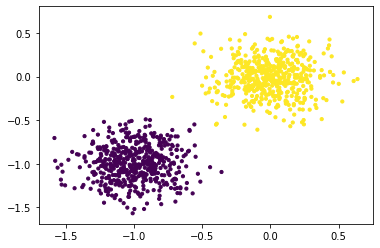

In [2]:
# Introduction to blobs 

from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs (n_samples=1000,centers=[[-1,-1], [0,0]], cluster_std=[0.2, 0.2], random_state =9)
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], marker='o', s=10, c=y)
plt.show()

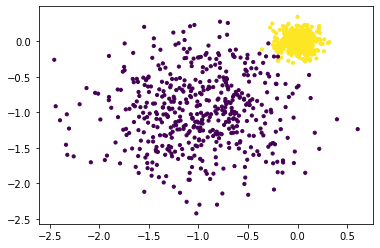

In [3]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs (n_samples=1000,centers=[[-1,-1], [0,0]], cluster_std=[0.5, 0.1], random_state =9)
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], marker='o', s=10, c=y)
plt.show()

**Task 1: Creating synthetic Data and visualizing it (10 minutes)** 

Using make_blob function from sklearn, Create a synthetic data set with four blobs with cluster_stds of 0.5,0.1,0.2,0.2.
Plot this dataset.

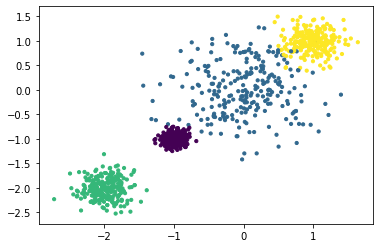

In [4]:
#task 1

X, y = make_blobs (n_samples=1000,centers=[[-1,-1], [0,0],[-2,-2], [1,1]], cluster_std=[0.1, 0.5,0.2,0.2], random_state =9)
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], marker='o', s=10, c=y)
plt.show()

**Task 2: Dividing data in training and testing sets and exploring k-means (5 minutes)**  

Use sklearn train test split to divide data into training and test sets. Do we need this step or is there a way around it. Discuss.

Explore the documentation for kmeans in scikit learn and discuss what the algorithim needs as parameters and what it returns. Find one or two useful attributes and discuss how you could use them. [kmeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans.fit)

In [ ]:
#task 2 Discuss the splitting 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

**Task 3: Fit your data into clusters using K-means (10 minutes)** 

Import K-means clustering algorithm from sklearn and fit your data on it. Here is the code to use K-means. Decide which data you should pass to it in order to train it.

```python
from sklearn.cluster import KMeans
cluster_kmeans=KMeans(n_clusters=4, random_state=9).fit(choose_appropiate_data_from_X)
```

In [27]:
#Task 3
X_tr = X[:800,:]
X_test = X[800:,:]
from sklearn.cluster import KMeans
clu_kmeans=KMeans(n_clusters=4, random_state=9).fit(X_tr)


**Task 4: Fit your data into clusters using K-means and plot clusters (10 minutes)** 

Use your clustering algorithm to predict clusters for all the the data. Plot data according to clusters assigned to them by K-means. Can you find any irregularities. Plot the centers of each cluster hint this in an attribute of the kmeans algorithm.

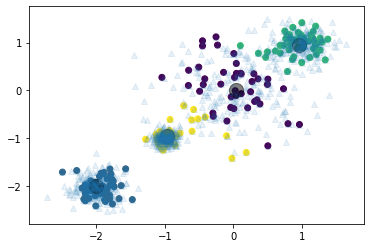

In [32]:
#task 4
y_pred =clu_kmeans.predict(X_test)
centers = clu_kmeans.cluster_centers_
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.scatter(centers[:,0],centers[:,1], c='black', s=200, alpha=0.5)
plt.scatter(X[:,0],X[:,1], marker='^', alpha=0.1)
plt.show()

**Task 5: Changing value of K (10 minutes)** 

Change value of k in K-means to 2 and repeat the tasks. Then change the value to 5 and repeat the tasks. Discuss what is happening as a group. 

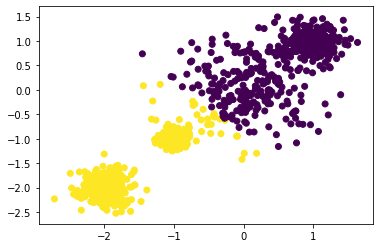

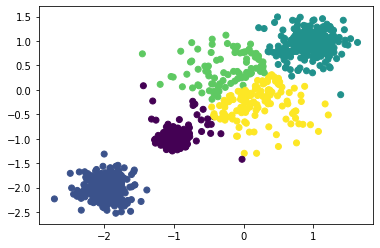

In [33]:
#task 5

clu_kmeans=KMeans(n_clusters=2, random_state=9).fit(X)
y_pred =clu_kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()


clu_kmeans=KMeans(n_clusters=5, random_state=9).fit(X)
y_pred =clu_kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

**Task 6: Exploring three dimensional data (15 minutes)**: 

Use make blob function to create two blobs with three input features (dimensions). Plot the blobs three times using 2 out of 3 features in one plot. It will help to look at clusters from different angles.Use K-mean clustering to fit this data and plot the assigned clusters from different view points. 

Assign an individual to show off these plots to the class. 

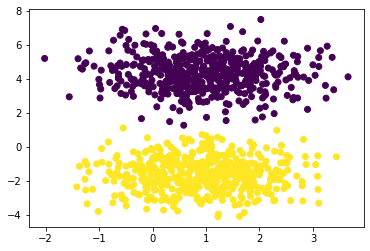

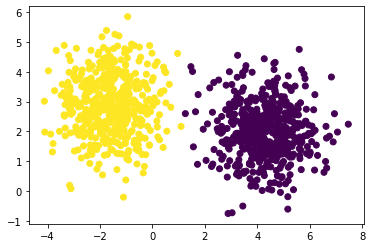

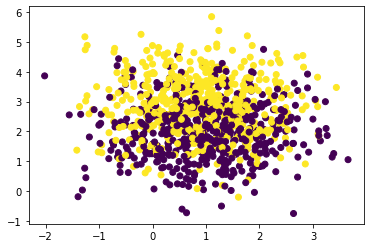

In [34]:
#task 6

X, y = make_blobs(n_samples=1000, centers=2, n_features=3, random_state=0)
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], marker='o', c=y)
plt.show()
plt.scatter(X[:,1], X[:,2], marker='o', c=y)
plt.show()
plt.scatter(X[:,0], X[:,2], marker='o', c=y)
plt.show()


**Task 7: Minibatch K-means(5 minutes)**  

MiniBatchKMeans is a version of KMeans algorithm which uses mini-batches to reduce the computation time. It is useful to use when dealing with large amounts of data. Use MiniBatchKMeans on data created in task 6. Here is the documentation [minibatch kmeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html)


```python
from sklearn.cluster import MiniBatchKMeans
mini_batch= MiniBatchKMeans(n_clusters=2, random_state=9).fit(X)
```

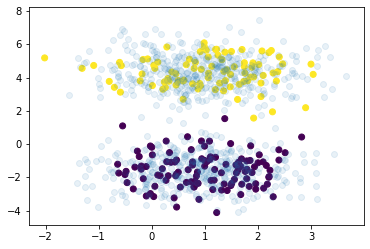

In [40]:
#Task 7
X_tr = X[:800,:]
X_test = X[800:,:]

from sklearn.cluster import MiniBatchKMeans
mini_batch= MiniBatchKMeans(n_clusters=2, random_state=9).fit(X_tr)

y_prediction = mini_batch.predict(X_test)
plt.scatter(X_test[:, 0], X_test[:,1 ], c=y_prediction)
plt.scatter(X_tr[:, 0], X_tr[:,1 ], alpha = 0.1)
plt.show()
